In [ ]:
!pip install transformers datasets

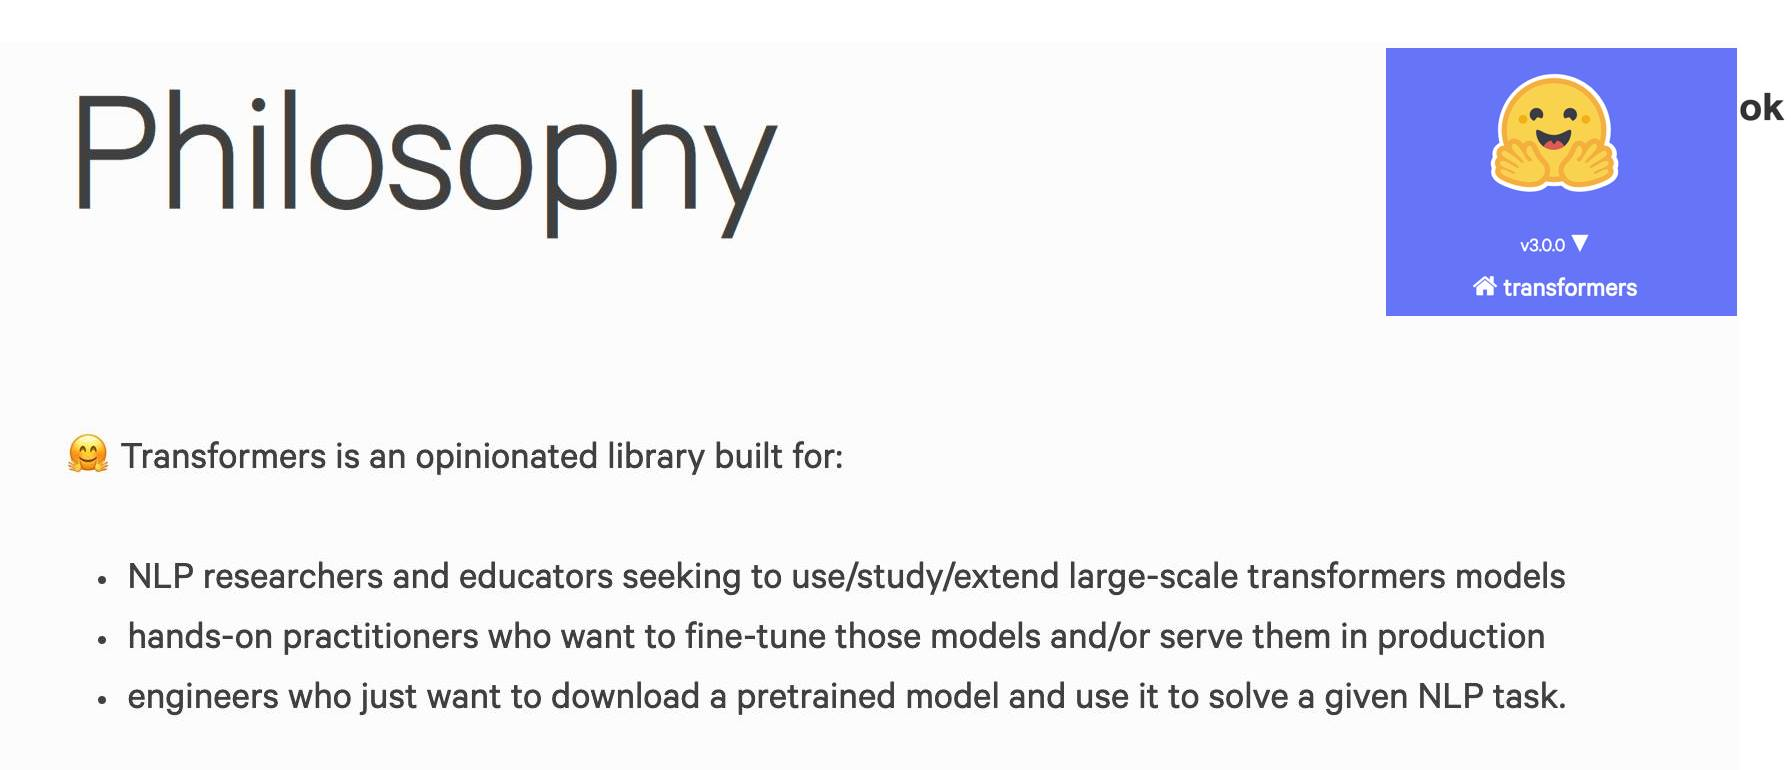

#### The pipeline function
파이프라인 함수는 텍스트를 처리해 NLP 작업을 수행하기 위한 end-to-end 오브젝트를 반환


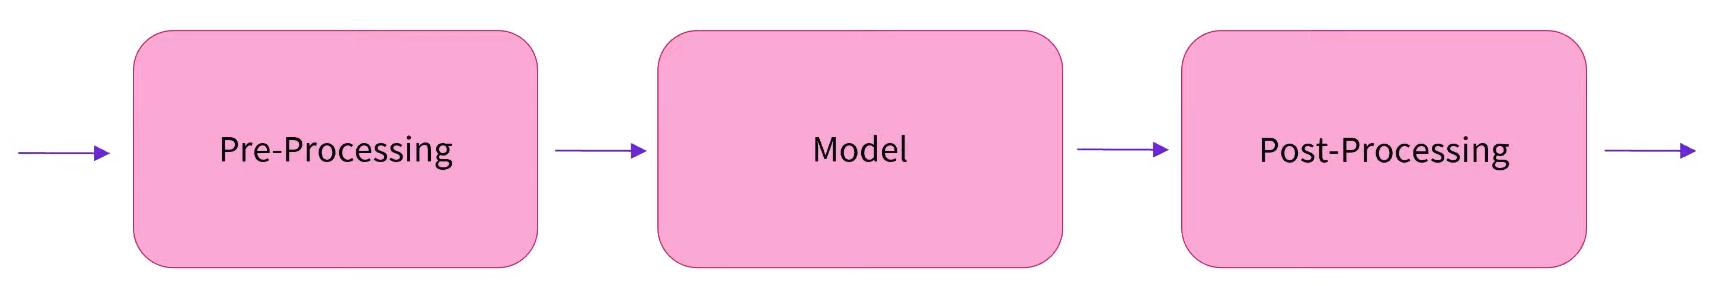

### 감정분석
첫 번째 예시로 pipeline api를 사용해 감정분석을 수행한다. 감정분석 분류기는 텍스트의 긍정과 부정을 분류한다.

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a Huggingface course my whole life")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9516072273254395}]

In [ ]:
# 동시에 여러 텍스트를 입력할 수 있음.
classifier = pipeline("sentiment-analysis")
classifier(["I've been waiting for a Huggingface course my whole life",
            "I hate this so much!"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9516072273254395},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

### zero-shot text classification
두 번째 예시로 텍스트 분류를 한다. zero-shot은 별도의 추가학습 없이 임의의 분류 대상을 자연어로 제시하고, 모델이 입력과 분류대상 사이의 연관성을 예측해 분류한다.

In [ ]:
classifier = pipeline("zero-shot-classification")
classifier(
            "This is a course about the Transformers library",
            candidate_labels = ["education", "politics", "business"]
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445995450019836, 0.11197379976511002, 0.04342666268348694]}

### text generation
세 번째 예시는 텍스트 생성이다. 텍스트 생성은 입력 프롬프트에 대해 자동완성한다. 출력은 다소 무작위적이다. 따라서 어떤 생성 모델을 호출하는가에 따라 달라질 수 있다. huggingface에 업로드된 사전학습된 모델을 사용할 수도 있고, 우리의 작업에 맞게 fine-tuning할 수도 있다.

In [ ]:
generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (50) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'In this course, we will teach you how to create and work your personal logo in Photoshop using the latest technology. You will learn how to program a web page using the latest tools, how to write, create and develop your logo using the latest APIs'}]

아래 링크로 접속해 사용할 수 있는 다른 모델을 확인하자.
https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads

NLP 파트의 Text Generation에는 더 많은 모델이 있고, 영어가 아닌 다른 모델들도 볼 수 있다.

이번에는 한국어 gpt3 모델을 가져와서 테스트 해본다.

In [ ]:
generator = pipeline("text-generation", model="kykim/gpt3-kor-small_based_on_gpt2")
generator("오늘 밤 경복궁의 모습은 마치", 
          max_length=30)


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


[{'generated_text': '오늘 밤 경복궁의 모습은 마치 한 폭의 그림처럼 아름답다.'}]

### NER
마지막 예시는 named entity recognition이다. NER은 문장의 형태소들이 어떤 객체인지를 추론한다. 특히 챗봇에서 이름, 장소, 시간 등의 특정 주요 정보를 추출하기 위해 유용하게 활용할 수 있다.

In [ ]:
ner = pipeline("ner")
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")


In [ ]:
ner = pipeline("ner", model="joon09/kor-naver-ner-name")
ner("오늘 부산 날씨는 덥고 습했다.")